# Decision Tree Homework by Edwin Laboy-Torres | CS-760: Machine Learning 

In [60]:
%load_ext autoreload
%autoreload 2
import pandas 
import numpy
from utils import *
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


---
### Problem 4.1 
#### To make things easier, transform each of your features into a binary variable. Describe the transformation that you will use for each feature, and explain your reasoning.

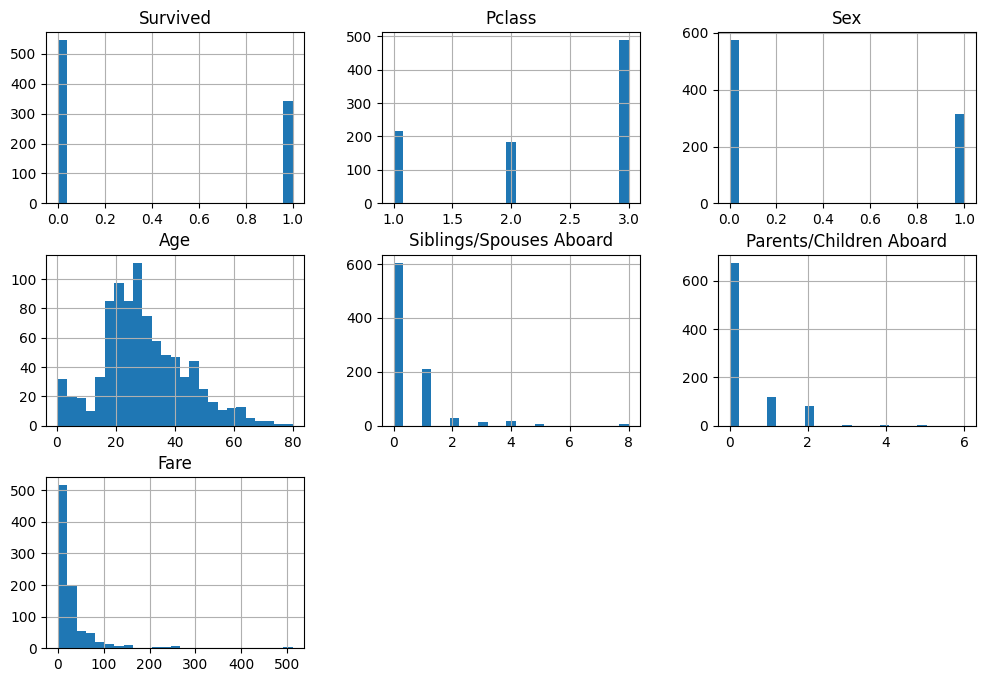

(None,
          Survived      Pclass         Sex         Age  \
 count  887.000000  887.000000  887.000000  887.000000   
 mean     0.385569    2.305524    0.354002   29.471443   
 std      0.487004    0.836662    0.478480   14.121908   
 min      0.000000    1.000000    0.000000    0.420000   
 25%      0.000000    2.000000    0.000000   20.250000   
 50%      0.000000    3.000000    0.000000   28.000000   
 75%      1.000000    3.000000    1.000000   38.000000   
 max      1.000000    3.000000    1.000000   80.000000   
 
        Siblings/Spouses Aboard  Parents/Children Aboard       Fare  
 count               887.000000               887.000000  887.00000  
 mean                  0.525366                 0.383315   32.30542  
 std                   1.104669                 0.807466   49.78204  
 min                   0.000000                 0.000000    0.00000  
 25%                   0.000000                 0.000000    7.92500  
 50%                   0.000000                 0

In [61]:
titanic_dataframe = load_titanic()
plt.rcParams["figure.figsize"] = [12,8]
titanic_dataframe.hist(bins = 25)
plt.show(), titanic_dataframe.describe()

- Pclass = True if Pclass bigger or equal than 2.305524, else False. Based on the mean.
- Sex = True if Sex is 1, else False. Already a binary option.
- Age = True if Age is bigger or equal than 29.471443, else False. Based on the mean.
- Siblings/Spouses Aboard = True if Siblings/Spouses Aboard, else False. Based on if the passanger has or
      doesn't have; True or False.
- Parents/Children Aboard = True if Parents/Children Aboard, else False. Based on if the passanger has or
      doesn't have; True or False.
- Fare = True if bigger or equal than 32.30542, else False. Based on the mean.

In [62]:
transformed_titanic_dataframe = transform_features(titanic_dataframe)
transformed_titanic_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Survived                 887 non-null    int64
 1   Pclass                   887 non-null    int64
 2   Sex                      887 non-null    int64
 3   Age                      887 non-null    int64
 4   Siblings/Spouses Aboard  887 non-null    int64
 5   Parents/Children Aboard  887 non-null    int64
 6   Fare                     887 non-null    int64
dtypes: int64(7)
memory usage: 48.6 KB


---
### Problem 4.2. 
#### Given vectors xj, y ∈ {0, 1}N containing the jth feature and the response of N i.i.d. samples, write your own code to estimate the mutual information I(xj,y). Submit your code in an appendix.

$$
H(x) := {\mathbb{E}} [{log_2(\frac{1}{\mathbb{P}(x)})}] = \sum_{x \in \mathrm x} \mathbb{P}(x = \mathrm{x}) log_2(\frac{1}{\mathbb{P}(x = \mathrm{x}})
$$

In [63]:
from utils import mutual_information
x = transformed_titanic_dataframe["Age"].tolist()
y = transformed_titanic_dataframe["Survived"].tolist()
mutual_information(x,y)

0.00011418180329729986

---
### Problem 4.3. 
#### Given vectors x1, . . . , xD, y ∈ {0, 1}N containing information about D features, and the response y of N i.i.d. samples, use your mutual information code above to write your own code to build a decision tree. Submit your code in an appendix. What stopping criteria did you use?

In [64]:
survived = transformed_titanic_dataframe["Survived"].to_numpy()
p_class = transformed_titanic_dataframe["Pclass"].to_numpy()
sex = transformed_titanic_dataframe["Sex"].to_numpy()
age = transformed_titanic_dataframe["Age"].to_numpy()
siblings_spouses_aboard = transformed_titanic_dataframe["Siblings/Spouses Aboard"].to_numpy()
parents_siblings_aboard = transformed_titanic_dataframe["Parents/Children Aboard"].to_numpy()
fare = transformed_titanic_dataframe["Fare"].to_numpy()

In [65]:
survived.shape, p_class.shape, sex.shape, age.shape, siblings_spouses_aboard.shape, parents_siblings_aboard.shape, fare.shape

((887,), (887,), (887,), (887,), (887,), (887,), (887,))

In [163]:
from decisionTrees import *
decision_tree = TitanicDecisionTree(p_class, sex, age, siblings_spouses_aboard, parents_siblings_aboard, fare, survived, False)
decision_tree.vertical_print()

└── Is G?
    ├── Is p_class?
    │   ├── Is sex?
    │   │   ├── Is age?
    │   │   │   ├── Is siblings/spouses_aboard?
    │   │   │   │   ├── Is parents/children_aboard?
    │   │   │   │   │   ├── Is fare?
    │   │   │   │   │   └── Is fare?
    │   │   │   │   │       └── Didn't survive
    │   │   │   │   └── Is parents/children_aboard?
    │   │   │   │       └── Didn't survive
    │   │   │   └── Is siblings/spouses_aboard?
    │   │   │       └── Didn't survive
    │   │   └── Is age?
    │   │       └── Didn't survive
    │   └── Is sex?
    │       └── Didn't survive
    └── Is p_class?
        └── Didn't survive


sex
p_class
fare
parents/children_aboard
siblings/spouses_aboard
age


In [ ]:
Problem 4.4. Use your code above to build a decision tree for the titanic dataset. Display the tree you
obtained

In [237]:
from decisionTrees import *
decision_tree = TitanicDecisionTree(p_class, sex, age, siblings_spouses_aboard, parents_siblings_aboard, fare, survived, False)
decision_tree.vertical_print()

└── Is S?
    ├── Is PassengerClass?
    │   ├── Is Sex?
    │   │   ├── Is Age?
    │   │   │   ├── Is SiblingsSpousesAboard?
    │   │   │   │   ├── Is ParentsChildrenAboard?
    │   │   │   │   │   ├── Is Fare?
    │   │   │   │   │   └── Is Fare?
    │   │   │   │   │       └── Didn't survive
    │   │   │   │   └── Is ParentsChildrenAboard?
    │   │   │   │       └── Didn't survive
    │   │   │   └── Is SiblingsSpousesAboard?
    │   │   │       └── Didn't survive
    │   │   └── Is Age?
    │   │       └── Didn't survive
    │   └── Is Sex?
    │       └── Didn't survive
    └── Is PassengerClass?
        └── Didn't survive


Problem 4.5. Write your own code to perform 10-fold cross-validation to assess the accuracy of your tree.
Submit your code in an appendix. What accuracy did you obtain?

In [271]:
cross_validation(decision_tree, 10, np.stack([p_class, sex, age, siblings_spouses_aboard, parents_siblings_aboard, fare]), np.expand_dims(survived, 0))

(6, 887) (1, 887)
(6, 89) (1, 89)
[1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 1 1 0 1 0 1 1
 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1]


ValueError: 'PassengerClass' is not a valid FeatureType

array([[1, 0, 0, 1, 0, 0],
       [0, 1, 1, 1, 0, 1],
       [1, 1, 0, 0, 0, 0],
       ...,
       [1, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 0]], dtype=int64)